# Chapter 7: Sampling


In [1]:
import pandas as pd
import sidetable
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.conversion import localconverter
# import NHANES package
base = importr('NHANES')

with localconverter(ro.default_converter + pandas2ri.converter):
  NHANES = ro.conversion.rpy2py(ro.r['NHANES'])

 
NHANES = NHANES.drop_duplicates(subset='ID')
NHANES_adult = NHANES.dropna(subset=['Height']).query('Age > 17')

rng = np.random.RandomState(12345)


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Table 7.1

In [2]:
NHANES_height = NHANES_adult.dropna(subset=['Height'])

sample_stats = []
sampsize = 50

for i in range(5):
    samp = NHANES_adult.sample(sampsize, random_state=rng)['Height']
    sample_stats.append([samp.mean(), samp.std()])

sample_stats_df = pd.DataFrame(sample_stats, columns=['mean', 'sd'])

sample_stats_df

,mean,sd
0,166.790,9.942985
1,168.344,9.248589
2,170.096,9.579143
3,169.114,8.705499
4,169.002,10.450593


## Figure 7.1


In [3]:
sampSize = 50 # size of sample
nsamps = 5000 # number of samples we will take

sampMeans = []
for i in range(nsamps):
    samp = NHANES_adult.sample(sampsize, random_state=rng)['Height']
    sampMeans.append([samp.mean()])

sampMeansDf = pd.DataFrame(sampMeans, columns=['sampleMean'])

Text(170.3497077244259, 0.3, 'Population mean')

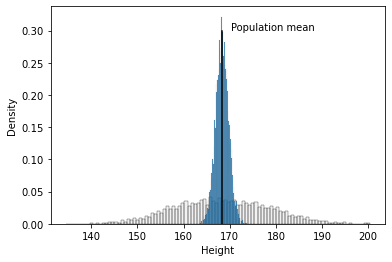

In [4]:
sns.histplot(NHANES_adult.Height, color='gray', alpha=0.1, stat='density', bins=100)
sns.histplot(sampMeansDf.sampleMean, stat='density', bins=100)
plt.plot([NHANES_adult.Height.mean(), NHANES_adult.Height.mean()], [0, 0.3], color='black')
plt.annotate('Population mean', [NHANES_adult.Height.mean() + 2, 0.3])

## Figure 7.2

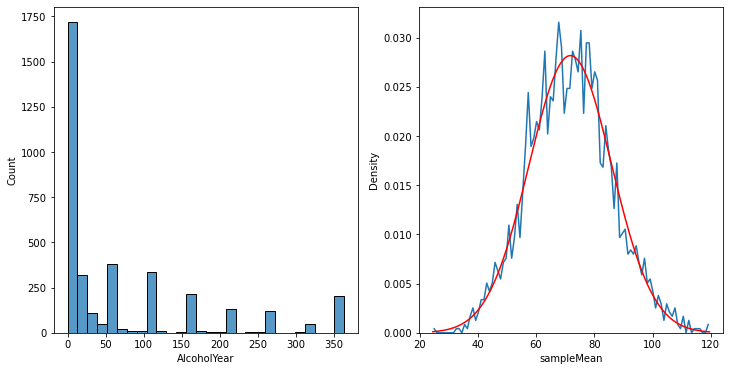

In [21]:
NHANES_clean = NHANES_adult.query('AlcoholYear >= 0').dropna(subset=['AlcoholYear'])

fig, ax = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(NHANES_clean.AlcoholYear, ax=ax[0])

def get_sampling_dist(sampSize=50, nsamps=2500):
    sampMeans = []
    for i in range(nsamps):
        samp = NHANES_clean.sample(sampsize, random_state=rng)['AlcoholYear']
        sampMeans.append([samp.mean()])
    return(pd.DataFrame(sampMeans, columns=['sampleMean']))

sampDist = get_sampling_dist()
sns.histplot(sampDist.sampleMean, bins=100, stat='density', element='poly', fill=None)
x = np.arange(sampDist.sampleMean.min(), sampDist.sampleMean.max(), 0.1)
y = norm.pdf(x, loc=sampDist.sampleMean.mean(), scale=sampDist.sampleMean.std())
plt.plot(x,y, color='red')